<a href="https://colab.research.google.com/github/gustavo-ifusp/exercicios_programacao_usp/blob/main/TEFE_2020_Atividade_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uncertainties

     |████████████████████████████████| 256kB 5.6MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import unumpy

In [ ]:
M, N = 10000, [100, 50, 10, 5, 4, 3, 2]

x0, sigma0 = .0, 1. # mean and standard deviation
dados = {
    n: np.random.default_rng().normal(x0, sigma0, (M,n)) for n in N
    }

Text(0.5, 0, 'V')

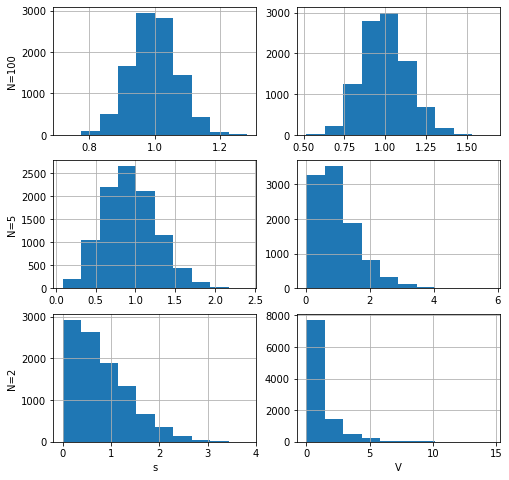

In [ ]:
fig, ax = plt.subplots(3,2, figsize=[8,8])

s100 = dados[100].std(ddof=1,axis=1)
ax[0,0].hist(s100)
ax[0,0].grid()
ax[0,0].set_ylabel('N=100')
ax[0,1].hist(s100**2)
ax[0,1].grid()

s5 = dados[5].std(ddof=1,axis=1)
ax[1,0].hist(s5)
ax[1,0].grid()
ax[1,0].set_ylabel('N=5')
ax[1,1].hist(s5**2)
ax[1,1].grid()

s2 = dados[2].std(ddof=1,axis=1)
ax[2,0].hist(s2)
ax[2,0].grid()
ax[2,0].set_xlabel('s')
ax[2,0].set_ylabel('N=2')
ax[2,1].hist(s2**2)
ax[2,1].grid()
ax[2,1].set_xlabel('V')

In [ ]:
s = np.array([dados[n].std(ddof=1,axis=1) for n in dados])
s_m = s.mean(axis=1)
s_s = s.std(ddof=1,axis=1)/s.shape[1]**(1/2)

In [ ]:
unumpy.uarray(s_m, s_s)

array([0.9968906278822304+/-0.000706915398253121,
       0.9933865247740165+/-0.0010137438296382443,
       0.9733654034454648+/-0.0023344071596333115,
       0.9368743706841098+/-0.0033926953053602642,
       0.9253225965576272+/-0.0038798373708405307,
       0.893651643846954+/-0.004661825117846147,
       0.7947902968482813+/-0.005973062209571186], dtype=object)

In [ ]:
V = s**2
V_m = V.mean(axis=1)
V_s = V.std(ddof=1,axis=1)/V.shape[1]**(1/2)

In [ ]:
s_count = np.sum(s<=1,axis=1)
s_count

array([5200, 5315, 5583, 5948, 6030, 6297, 6800])

In [ ]:
p = s_count/s.shape[1]
q = 1-p
s_count_s = (s.shape[1]*p*q)**(1/2)
s_count_s

array([49.95998399, 49.90067635, 49.65894783, 49.09307079, 48.92759957,
       48.28849863, 46.64761516])

In [ ]:
V_count = np.sum(V<=1,axis=1)
V_count

array([5200, 5315, 5583, 5948, 6030, 6297, 6800])

In [ ]:
p = V_count/V.shape[1]
q = 1-p
V_count_s = (V.shape[1]*p*q)**(1/2)
V_count_s

array([49.95998399, 49.90067635, 49.65894783, 49.09307079, 48.92759957,
       48.28849863, 46.64761516])

In [ ]:
pd.DataFrame([unumpy.uarray(s_m, s_s),
              unumpy.uarray(V_m, V_s),
              unumpy.uarray(s_count, s_count_s),
              unumpy.uarray(V_count, V_count_s)], 
             index=['s_m (média de s)', 'V_m (média de V)',
                    'Número de casos em que s<=sigma_0',
                    'Número de casos em que V<=V_0'],
             columns=['(1) N=100', '(2) N=50', '(3) N=10', 
                    '(4) N=5', '(5) N=4', '(6) N=3', '(7) N=2']
             )

,(1) N=100,(2) N=50,(3) N=10,(4) N=5,(5) N=4,(6) N=3,(7) N=2
s_m (média de s),0.9969+/-0.0007,0.9934+/-0.0010,0.9734+/-0.0023,0.9369+/-0.0034,0.925+/-0.004,0.894+/-0.005,0.795+/-0.006
V_m (média de V),0.9988+/-0.0014,0.9971+/-0.0020,1.002+/-0.005,0.993+/-0.007,1.007+/-0.008,1.016+/-0.010,0.988+/-0.014
Número de casos em que s<=sigma_0,(5.20+/-0.05)e+03,(5.32+/-0.05)e+03,(5.58+/-0.05)e+03,(5.95+/-0.05)e+03,(6.03+/-0.05)e+03,(6.30+/-0.05)e+03,(6.80+/-0.05)e+03
Número de casos em que V<=V_0,(5.20+/-0.05)e+03,(5.32+/-0.05)e+03,(5.58+/-0.05)e+03,(5.95+/-0.05)e+03,(6.03+/-0.05)e+03,(6.30+/-0.05)e+03,(6.80+/-0.05)e+03
